# Análise exploratória de dados

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### **Leitura dos Dados**

In [2]:
df = pd.read_csv("../data/raw/data.csv")

In [3]:
df.head()

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
#Excluindo coluna de indice e renomeando as colunas
df = df.drop(columns=['Unnamed: 0'])

df.rename(columns={
    'carat': 'peso',
    'cut': 'corte',
    'color': 'cor',
    'clarity': 'claridade',
    'depth': 'profundidade',
    'table': 'tabela',
    'price': 'preco',    
}, inplace=True)

df.head()

,peso,corte,cor,claridade,profundidade,tabela,preco,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
df_dictionary = pd.read_csv('../data/external/dictionary.csv')
df_dictionary

,variavel,descricao,tipo,subtipo
0,carat,"Peso do diamante (0,2--5,01).",quantitativa,contínua
1,cut,"Qualidade do corte (Fair, Good, Very Good, Pre...",qualitativa,ordinal
2,color,"Cor de diamante, de D (melhor) a J (pior)",qualitativa,ordinal
3,clarity,"Clareza do diamante (I1 (pior), SI2 SI1, VS2, ...",qualitativa,ordinal
4,depth,Percentagem total de profundidade = z /média(x...,quantitativa,contínua
5,table,Largura do topo do diamante em relação ao pont...,quantitativa,contínua
6,price,"Preço em dólares dos EUA ($326-$18,823).",quantitativa,discreta
7,x,Comprimento em mm (0-10.74).,quantitativa,contínua
8,y,Largura em mm (0-58.9).,quantitativa,contínua
9,z,"Profundidade em mm (0-31,8).",quantitativa,contínua


## 1. Descrição dos dados

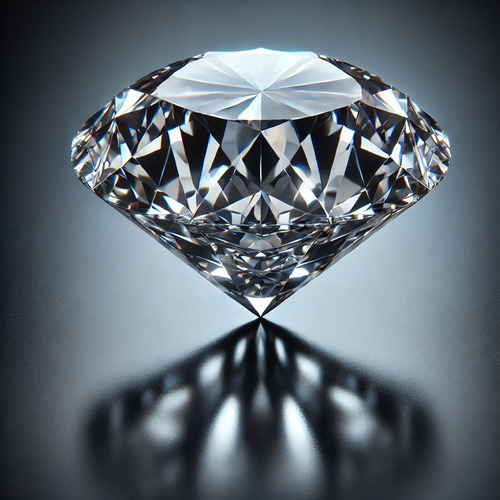

O conjunto de dados de diamantes fornece informações detalhadas sobre características de pedras preciosas, incluindo peso, corte, cor, clareza, profundidade, tabela, preço e dimensões (x, y, z). A variável carat descreve o peso do diamante em quilates, enquanto cut, color e clarity representam, respectivamente, a qualidade do corte, a cor e a clareza da pedra, com cada uma delas classificada em uma escala específica. Depth e table indicam as proporções da pedra, enquanto price reflete o valor do diamante. As variáveis x, y e z fornecem as dimensões tridimensionais do diamante, permitindo uma análise mais detalhada de suas proporções.

Esse conjunto de dados, com variáveis quantitativas e qualitativas, oferece uma base robusta para análises que exploram os fatores que influenciam o preço dos diamantes, como a relação entre o peso e a qualidade do corte, cor e clareza, além de possibilitar a comparação de diferentes características para entender melhor as preferências dos consumidores e os critérios de avaliação dos diamantes no mercado.
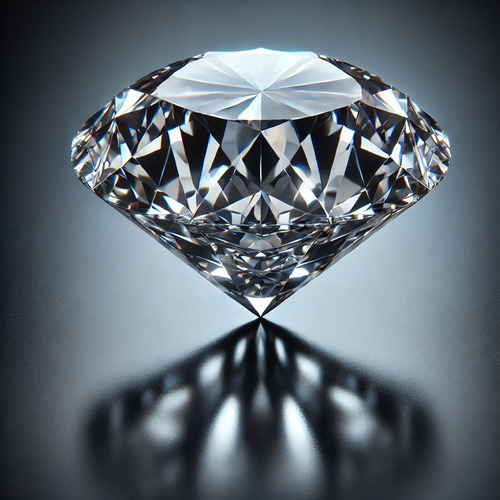

In [6]:
print(f"Quantidade de instâncias: {df.shape[0]}")
print(f"Quantidade de variáveis: {df.shape[1]}")

Quantidade de instâncias: 53940
Quantidade de variáveis: 10


In [7]:
print("Tipos de Variáveis:")
print(df.dtypes)

Tipos de Variáveis:
peso            float64
corte            object
cor              object
claridade        object
profundidade    float64
tabela          float64
preco             int64
x               float64
y               float64
z               float64
dtype: object


In [8]:
print("Quantidade de valores faltantes:")
print(df.isnull().sum())

Quantidade de valores faltantes:
peso            0
corte           0
cor             0
claridade       0
profundidade    0
tabela          0
preco           0
x               0
y               0
z               0
dtype: int64


In [9]:
print({df.info()})

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   peso          53940 non-null  float64
 1   corte         53940 non-null  object 
 2   cor           53940 non-null  object 
 3   claridade     53940 non-null  object 
 4   profundidade  53940 non-null  float64
 5   tabela        53940 non-null  float64
 6   preco         53940 non-null  int64  
 7   x             53940 non-null  float64
 8   y             53940 non-null  float64
 9   z             53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB
{None}


In [10]:
print("Resumo estatístico:")
print(df.describe(include="all"))

Resumo estatístico:
                peso  corte    cor claridade  profundidade        tabela  \
count   53940.000000  53940  53940     53940  53940.000000  53940.000000   
unique           NaN      5      7         8           NaN           NaN   
top              NaN  Ideal      G       SI1           NaN           NaN   
freq             NaN  21551  11292     13065           NaN           NaN   
mean        0.797940    NaN    NaN       NaN     61.749405     57.457184   
std         0.474011    NaN    NaN       NaN      1.432621      2.234491   
min         0.200000    NaN    NaN       NaN     43.000000     43.000000   
25%         0.400000    NaN    NaN       NaN     61.000000     56.000000   
50%         0.700000    NaN    NaN       NaN     61.800000     57.000000   
75%         1.040000    NaN    NaN       NaN     62.500000     59.000000   
max         5.010000    NaN    NaN       NaN     79.000000     95.000000   

               preco             x             y             z  
co

## 2. Perguntas de partida e hipóteses

1. Como o peso dos diamantes se relaciona com o preço? Hipótese: Quanto mais pesado, os diamantes tendem a ser mais caro.
2. Existe correlação entre a qualidade do corte e o preço? Hipótese: Diamantes com cortes de qualidade superior (Ideal) tendem a ser mais caro.
3. Como a clareza e a cor afetam o preço dos diamantes? Hipótese: Diamantes com melhor clareza (IF) e cor mais pura (D) tendem a ser mais caro.
4. Qual a distribuição dos preços? Podemos identificar valores atípicos ou padrões específicos?

#### 1. Como o peso dos diamantes se relaciona com o preço?

In [11]:
print(df[["peso", "preco"]].corr())

           peso     preco
peso   1.000000  0.921591
preco  0.921591  1.000000


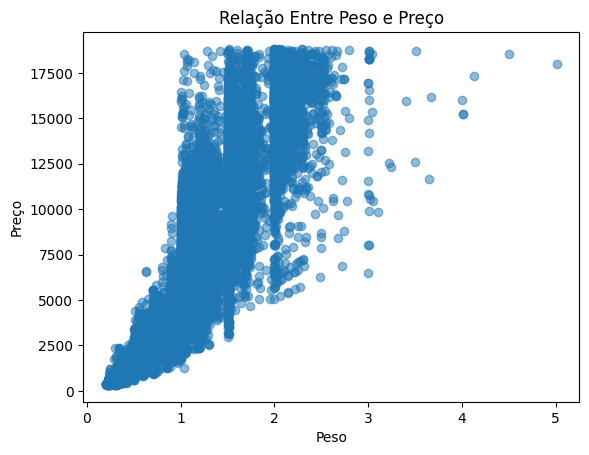

In [12]:
plt.scatter(df["peso"], df["preco"], alpha=0.5)
plt.title("Relação Entre Peso e Preço")
plt.xlabel("Peso")
plt.ylabel("Preço")
plt.show()

A análise mostra uma correlação positiva entre o peso (carat) e o preço (price) dos diamantes, indicando que diamantes mais pesados são mais caros. À medida que o peso do diamante aumenta, o preço tende a aumentar também. Essa correlação é esperada, já que diamantes maiores geralmente são mais valiosos.

No entanto, também é possível notar uma grande dispersão, especialmente em pesos mais altos. Isso indica que, embora o peso tenha uma influência significativa no preço, outros fatores (como a qualidade, a clareza, a cor e o corte do diamante) também podem afetar o valor final, causando variações nos preços para diamantes de peso semelhante.

#### 2. Existe correlação entre a qualidade do corte (cut) e o preço (price)?

In [13]:
mean_prices = df.groupby("corte")["preco"].mean().sort_values()
print(mean_prices)

corte
Ideal        3457.541970
Good         3928.864452
Very Good    3981.759891
Fair         4358.757764
Premium      4584.257704
Name: preco, dtype: float64


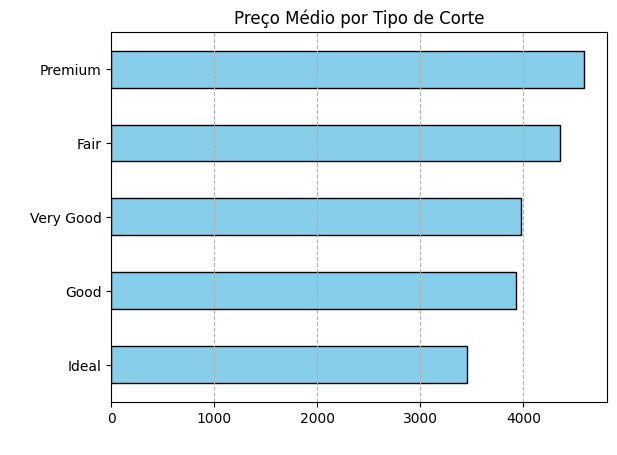

In [14]:
mean_prices.plot(kind="barh", color="skyblue", edgecolor="black")
plt.title("Preço Médio por Tipo de Corte")
plt.xlabel(" ")
plt.ylabel(" ")
plt.grid(axis="x", linestyle="--", alpha=1.0) 
plt.show()

A relação entre a qualidade do corte e o preço dos diamantes não é totalmente direta. Embora os cortes "Premium" e "Fair" apresentem os preços médios mais altos, com o "Premium" sendo o mais caro, o corte "Ideal", que é de alta qualidade, tem um preço médio menor que outros cortes como "Good" e "Very Good". Isso indica que a qualidade do corte não é o único fator determinante do preço.

#### 3. Como a clareza (clarity) e a cor (color) afetam o preço dos diamantes?

In [15]:
print(df.groupby("claridade")["preco"].mean().sort_values())

claridade
VVS1    2523.114637
IF      2864.839106
VVS2    3283.737071
VS1     3839.455391
I1      3924.168691
VS2     3924.989395
SI1     3996.001148
SI2     5063.028606
Name: preco, dtype: float64


In [16]:
print(df.groupby("cor")["preco"].mean().sort_values())

cor
E    3076.752475
D    3169.954096
F    3724.886397
G    3999.135671
H    4486.669196
I    5091.874954
J    5323.818020
Name: preco, dtype: float64


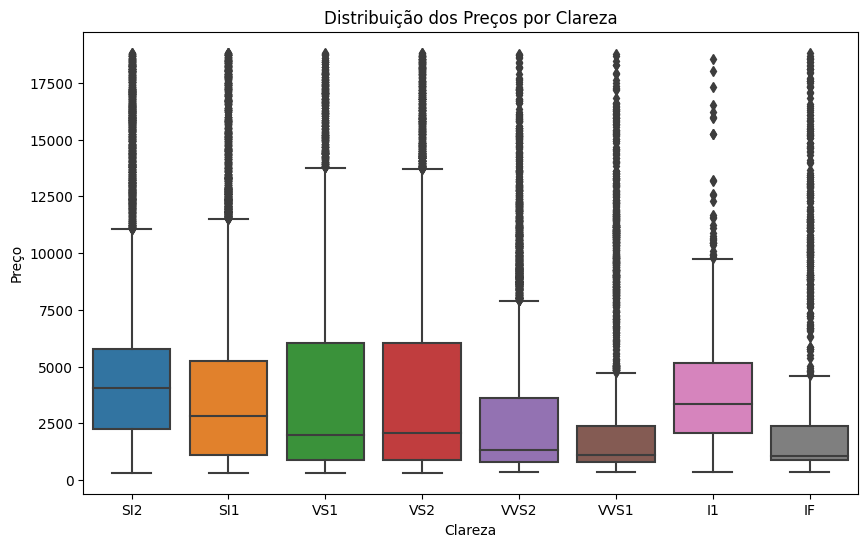

In [17]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='claridade', y='preco', data=df)
plt.title('Distribuição dos Preços por Clareza')
plt.xlabel('Clareza')
plt.ylabel('Preço')
plt.show()

A clareza tem um impacto claro e positivo no preço dos diamantes, com categorias como "VS1" e "VS2" apresentando preços medianos mais altos, indicando que diamantes com menos inclusões visíveis tendem a ser mais caros. No entanto, a ampla dispersão dentro de cada categoria mostra que outros fatores também contribuem significativamente para o preço, tornando a clareza uma variável importante, mas não determinante isolada do valor do diamante.

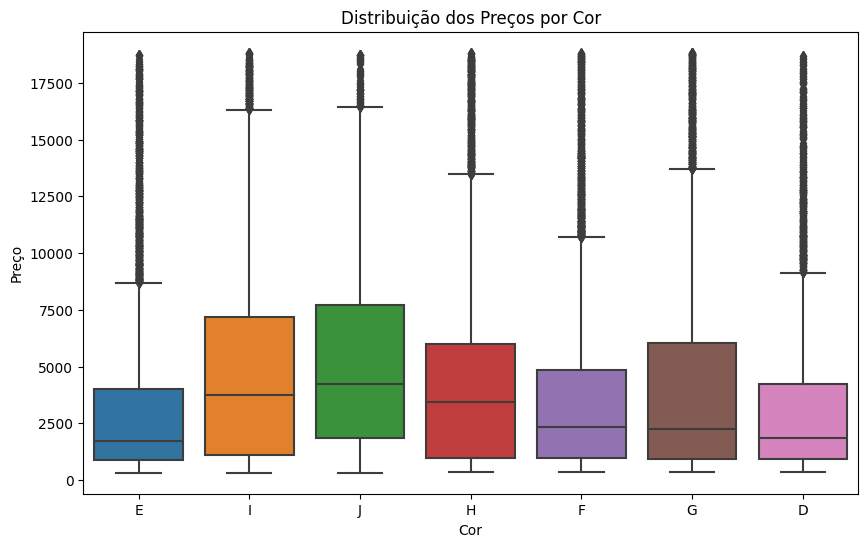

In [18]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='cor', y='preco', data=df)
plt.title('Distribuição dos Preços por Cor')
plt.xlabel('Cor')
plt.ylabel('Preço')
plt.show()

A cor dos diamantes não tem um impacto tão forte no preço, já que as diferenças nos preços medianos entre as categorias de cor não são acentuadas. Embora a distribuição de preços seja ampla e haja muitos outliers em todas as categorias, diamantes de várias cores podem ter preços similares, dependendo de fatores como peso e clareza. Embora diamantes incolores ou quase incolores (como D, E e F) sejam mais valorizados, não há uma tendência clara de aumento de preço com a redução da coloração, sugerindo que outros fatores também influenciam o preço.

#### 4. Qual a distribuição dos preços? Podemos identificar valores atípicos ou padrões específicos?

In [19]:
Q1 = df['preco'].quantile(0.25)
Q3 = df['preco'].quantile(0.75)
IQR = Q3 - Q1
outliers = df[(df['preco'] < (Q1 - 1.5 * IQR)) | (df['preco'] > (Q3 + 1.5 * IQR))]
print(f"Número de valores atípicos: {outliers.shape[0]}")
print("Valores atípicos:\n", outliers[['preco']])

Número de valores atípicos: 3540
Valores atípicos:
        preco
23820  11886
23821  11886
23822  11888
23823  11888
23824  11888
...      ...
27745  18803
27746  18804
27747  18806
27748  18818
27749  18823

[3540 rows x 1 columns]


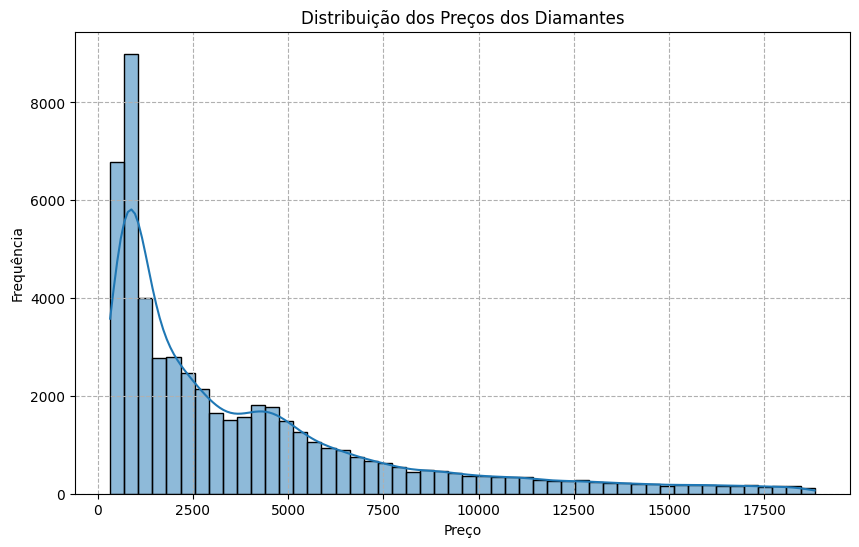

In [20]:
plt.figure(figsize=(10, 6))
sns.histplot(df['preco'], bins=50, kde=True)
plt.title("Distribuição dos Preços dos Diamantes")
plt.xlabel("Preço")
plt.ylabel("Frequência")
plt.grid(axis="y", linestyle="--", alpha=1.0)
plt.grid(axis="x", linestyle="--", alpha=1.0) 
plt.show()

Os preços dos diamantes apresentam uma distribuição assimétrica positiva, com a maioria dos diamantes concentrados em faixas de preço mais baixas (entre 0 e 2500). A cauda longa à direita indica valores atípicos nos preços mais altos. Esses outliers representam uma minoria de diamantes que se destacam devido a características exclusivas, geralmente associados a diamantes de alta qualidade ou raridade.

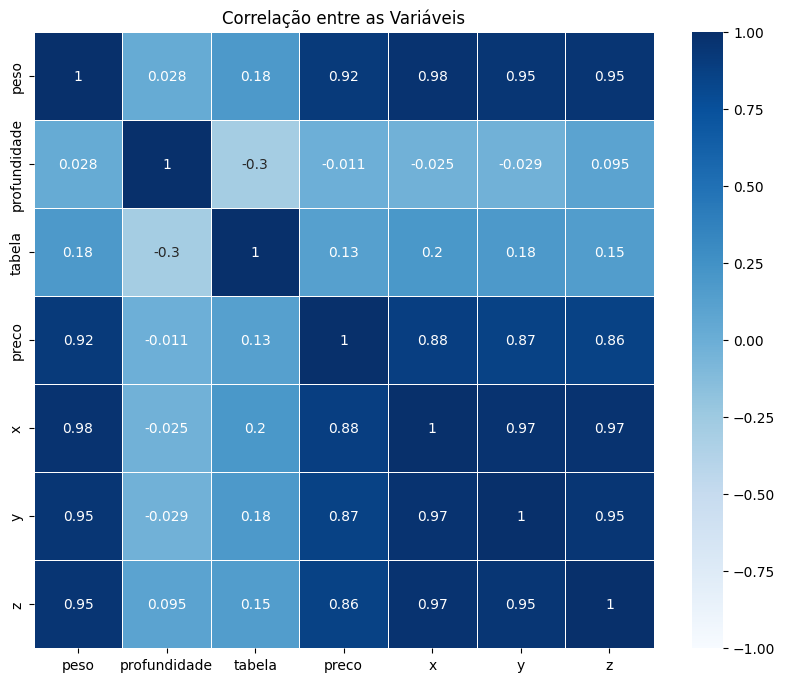

In [21]:
correlation_matrix = df.corr(numeric_only=True)

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', vmin=-1, vmax=1, linewidths=0.5)
plt.title('Correlação entre as Variáveis')
plt.show()

* Peso e tamanho físico são os principais fatores que influenciam o valor do diamante no mercado.
* Embora importantes para a estética, profundidade e lrgura têm impacto limitado na precificação.
* A alta correlação entre peso e dimensões sugere que valores fora dessa relação podem ser outliers, representando diamantes com proporções incomuns.

## 3. Insights

**Relação entre Peso e Preço**
* **Relação positiva:** O preço tende a aumentar com o peso, indicando uma correlação positiva entre os dois.
* **Variação em pesos menores:** Diamantes pequenos (menores que 1 quilate) têm grande variação de preço, sugerindo influência de outros fatores, como corte e clareza.
* **Maior dispersão em pesos altos:** Para diamantes maiores (acima de 2 quilates), o preço é menos previsível, indicando que características além do peso afetam o valor.
* **Outliers:** Alguns diamantes fora da curva indicam preços excepcionalmente altos, provavelmente devido a qualidades raras.

**Relação entre Corte e Preço**
* **Cortes Premium e Fair:** Os cortes "Premium" e "Fair" apresentam os preços médios mais altos, com "Premium" sendo o tipo de corte mais caro. Isso indica que diamantes com cortes classificados como "Premium" são valorizados no mercado, mas o corte "Fair", que não é considerado de alta qualidade, também possui um preço médio elevado.
* **Cortes de Melhor Qualidade:** Curiosamente, o corte "Ideal", que é tecnicamente de alta qualidade, apresenta um preço médio menor comparado aos cortes "Good", "Very Good" e "Fair". Isso sugere que a qualidade do corte, isoladamente, não determina o preço.
* Não existe uma correlação simples e direta entre a qualidade do corte e o preço. Embora cortes de qualidade mais alta sejam valorizados, outros fatores parecem desempenhar papéis importantes no valor do diamante, levando a uma distribuição de preços que não segue exatamente a classificação de corte.

**Relação entre Cor e Clareza com o Preço**
* **Clareza:** Os preços variam significativamente entre as categorias de clareza, com algumas classes como "VS1" e "VS2" mostrando preços medianos ligeiramente mais altos. Isso sugere que, conforme a clareza aumenta (menos inclusões visíveis), o preço do diamante tende a ser maior.
* **Preço Mediano e Cor:**

    ***Clareza:***
    * Diamantes com maior clareza tendem a ter preços medianos mais elevados, indicando que diamantes com menos inclusões (mais puros) são mais valorizados.
    * A clareza tem um impacto mais direto no preço do diamante, com categorias como VVS1, VVS2 e IF apresentando medianas de preços mais altas.
    * Apesar da tendência de aumento no preço com a melhoria da clareza, outros fatores podem afetar o preço.

    ***Cor:***
    * Não há uma diferença acentuada nos preços medianos entre as diferentes categorias de cor, isto é a cor não impacta o preço de forma tão forte quanto a clareza.
    * A variação de preços dentro de cada categoria de cor é ampla, com muitos outliers, indicando que outros fatores podem afetar o preço, mesmo dentro da mesma categoria de cor.
    * Diamantes de cor incolor ou quase incolor (D, E, F) são mais valorizados, mas não há uma tendência clara de aumento do preço conforme a cor se torna mais incolor.
    * As categorias de cor não incolores (como I e J) têm preços medianos similares às de cor mais incolor, o que pode ser influenciado por uma combinação de outros fatores.

**Distribuição dos Preços e Valores Atípicos**
* **Distribuição dos Preços:** O histograma de preços dos diamantes apresenta uma distribuição assimétrica positiva, com uma maior concentração de valores entre 0 e 2500. Esse padrão indica que a maioria dos diamantes está dentro de uma faixa de preço relativamente baixa, enquanto preços mais altos são menos frequentes, estendendo-se para a cauda direita da distribuição.
* **Valores Atípicos:** Observamos uma cauda longa na distribuição, o que sugere a presença de valores atípicos (outliers) nos preços mais altos. Esses valores podem representar diamantes de maior qualidade, tamanho ou raridade, elevando seu preço em comparação à maioria das pedras.

**Correlação entre as Variáveis**
* **Peso do Diamante:** O peso do diamante mostra uma forte correlação positiva com as dimensões físicas do diamante, como x, y, z (próximas de 1). Isso é esperado, pois diamantes maiores têm mais volume e, consequentemente, mais peso.
Peso também apresenta uma alta correlação positiva com o preço (0,92). Esse resultado sugere que o peso é um dos principais fatores que influenciam o preço do diamante, com diamantes mais pesados tendendo a ser mais caros.
* **Dimensões Físicas (x, y, z):** As variáveis de dimensão física x (comprimento), y (largura), e z (profundidade) têm fortes correlações entre si (próximas de 1). Isso faz sentido, já que as três dimensões estão relacionadas ao tamanho total do diamante.
Essas dimensões também mostram uma correlação moderada a forte com o preço (entre 0,86 e 0,88), o que significa que diamantes maiores em termos de dimensões físicas tendem a ter valores mais altos, embora o peso tenha uma influência ainda mais direta.
* **Profundidade e Tabela:** As variáveis profundidade (profundidade relativa do corte) e tabela (tamanho da face superior do diamante) apresentam correlações fracas com o preço (próximas de zero). Isso sugere que essas variáveis não são tão determinantes para o valor do diamante quanto o peso e as dimensões físicas.
A profundidade possui uma correlação muito baixa ou negativa com outras variáveis, o que indica que, além de ter pouca relação com o preço, a profundidade não está fortemente associada a outras características do diamante.